In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import random
from pandas import DataFrame
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score


# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario8_individual_model_approach"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

AEW541_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2020-09-18 16:57:04.136507
EndTime : 2020-09-18 16:57:06.846603
AEW541’s final rmse value is = 1.184622
AEW541 R-squared value is = -0.308684
Nilotinib_//n
train_X shape: (248, 21213)
248 train samples
61 test samples
StartTime : 2020-09-18 16:57:07.460475
EndTime : 2020-09-18 16:57:09.222500
Nilotinib’s final rmse value is = 0.533258
Nilotinib R-squared value is = -0.000538
17-AAG_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2020-09-18 16:57:09.694721
EndTime : 2020-09-18 16:57:12.476721
17-AAG’s final rmse value is = 1.328611
17-AAG R-squared value is = -0.010143
PHA-665752_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2020-09-18 16:57:13.227842
EndTime : 2020-09-18 16:57:15.181631
PHA-665752’s final rmse value is = 0.729069
PHA-665752 R-squared value is = -0.006406
Lapatinib_//n
train_X shape: (303, 21213)
303 train samples
75 test sam

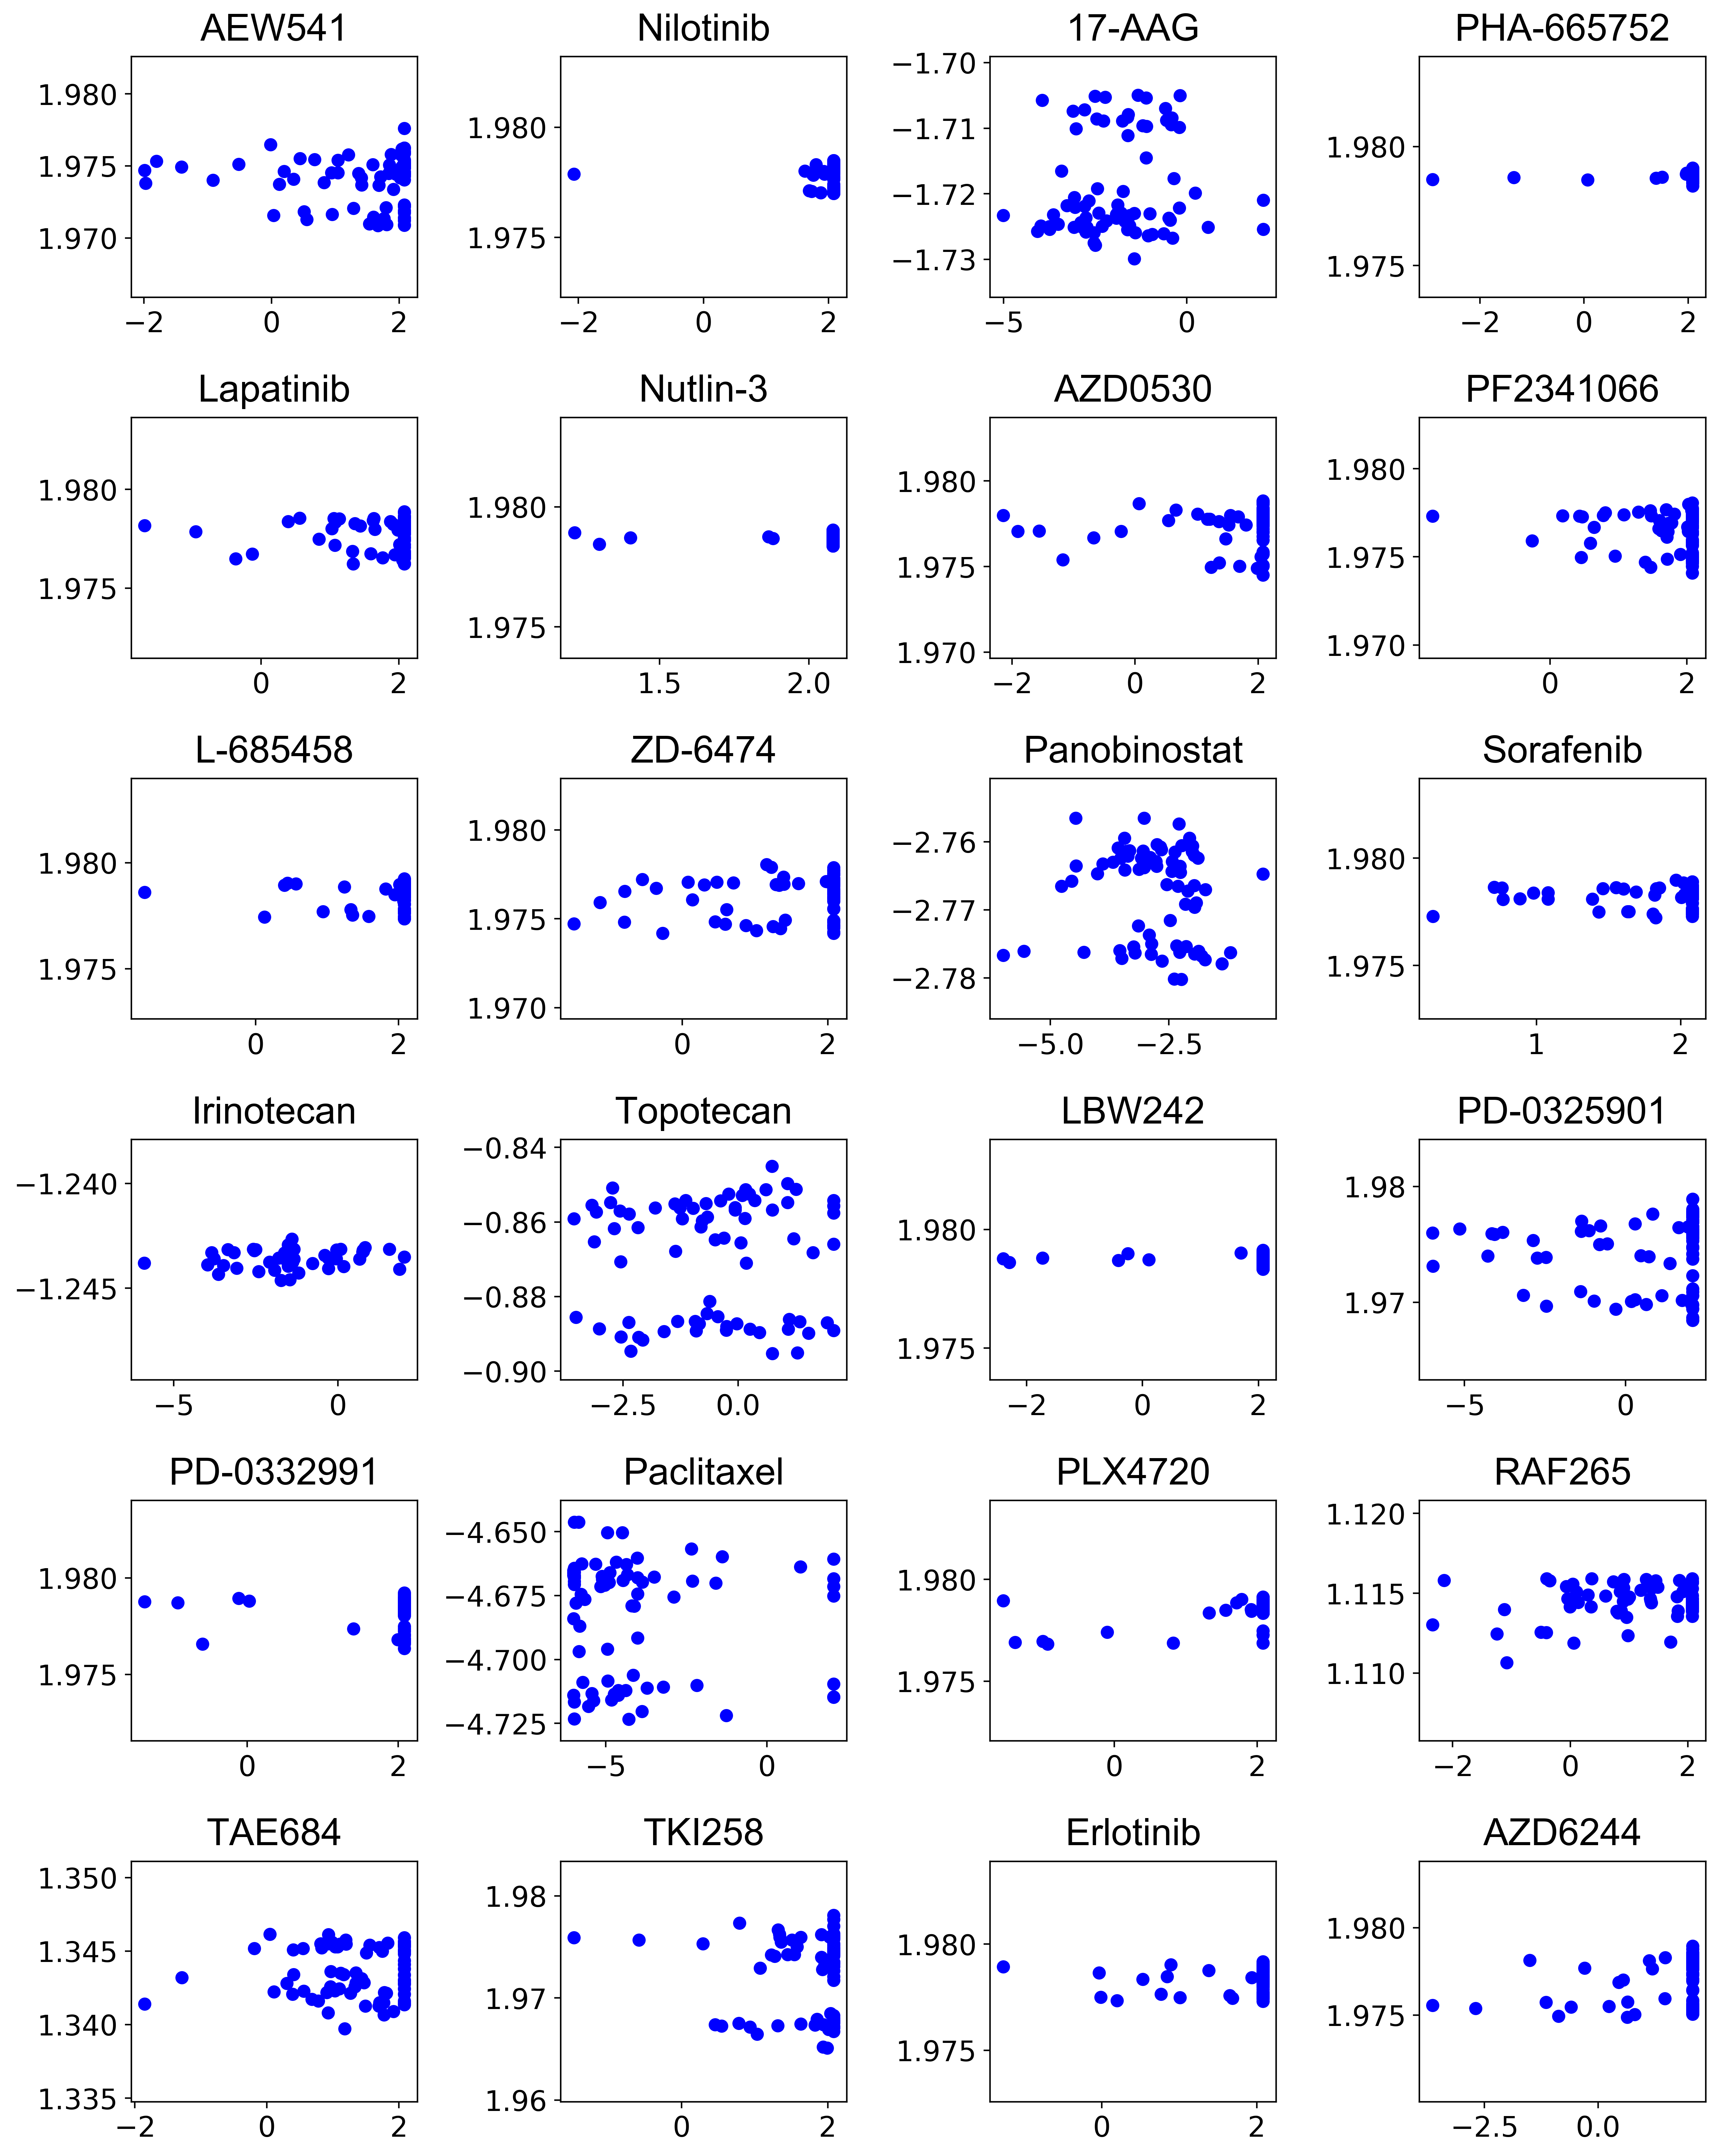

In [3]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(workdir + "//200914_MC9K_%s.npz" % dname)
    ss0 = np.load(workdir + '//200914_MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    svr_lin = SVR(C=0.01)
    svr_lin.fit(train_X, train_y).predict(test_X)
    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = svr_lin.predict(test_X)
    predicted_value = predicted_classes
        
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//scenario8_individual_approach//Table//SVR"
    c.to_csv(workdir + '//200915_scenario8_SVR_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='blue')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//scenario8_individual_model_approach"
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//scenario8_individual_approach//Figure"    

plt.savefig(workdir +'//200915_scenario8_SVR_plot.png', dpi=400)

In [4]:
num

25

In [5]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [6]:
result

,Drug,RMSE,R2value
0,AEW541,1.184622,-0.308684
1,Nilotinib,0.533258,-0.000538
2,17-AAG,1.328611,-0.010143
3,PHA-665752,0.729069,-0.006406
4,Lapatinib,0.770744,-0.120837
5,Nutlin-3,0.167702,-0.171711
6,AZD0530,1.024217,-0.123220
7,PF2341066,0.731458,-0.159693
8,L-685458,0.596788,-0.030145
9,ZD-6474,1.041778,-0.266684


In [7]:
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//Scenario8_individual_approach" 
result.to_csv(workdir +'//200915_scenario8_SVR_24drugs_metrics.csv', index=False)